In [186]:
import pandas as pd
import numpy as np
import blimpy as bl
import pylab as plt
import inspect
import turbo_seti
from turbo_seti.find_doppler.find_doppler import FindDoppler
import turbo_seti
import os
%matplotlib inline

### Function to plot hits

In [240]:
def plothit(h5file, hit, f_start=None, f_stop=None, ax=None, **kwargs):
    filen = os.path.splitext(h5file)[0]
    
    df = turbo_seti.find_event.make_table(filen+'.dat')
    df = df.set_index('TopHitNum')
    
    if not f_start or not f_stop: 
        f_start = df.loc[hit]['FreqStart']
        f_stop = df.loc[hit]['FreqEnd']
    
    ax = plt.gca()
    fb = bl.Waterfall(h5file, f_start=f_start, f_stop=f_stop)
    fb.plot_waterfall(**kwargs)
    
    return df.loc[[hit]]

In [247]:
fb2 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil')
fb2.info()


--- File Info ---
    telescope_id :                                4
           nbits :                               32
     source_name :                        ProxCen_S
       data_type :                                1
          nchans :                         33554432
           ibeam :                                1
     barycentric :                                0
   pulsarcentric :                                0
           tsamp :                        16.777216
            foff :          -3.814697265625e-06 MHz
         src_raj :                     14:29:42.949
         src_dej :                     -61:59:53.84
   tstart (ISOT) :          2019-04-29T13:47:46.000
    tstart (MJD) :               58602.574837962966
          nbeams :                                1
            fch1 :                       1472.0 MHz
            nifs :                                1

Num ints in file :                              107
      File shape :               (107, 1, 33

Checking out 21cm hydrogen emission of the file I am running turboSETI on

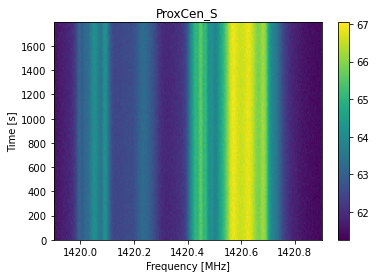

In [3]:
fb2.plot_waterfall(logged=True)

### Doppler drift search

In [24]:
dop = FindDoppler('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil', 1, snr=25,
                  out_dir='turboSETIout/')

In [25]:
dop.get_info()

'File: turboSETIout/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5\n drift rates (min, max): (0.000000, 1.000000)\n SNR: 25.000000\n'

In [26]:
dop.search()

In [5]:
df = turbo_seti.find_event.make_table('turboSETIout/blc06_ProxCen_S_2019-04-29T13:47:46.000.dat')
df = df.set_index('TopHitNum')

In [92]:
df=df.sort_values('DriftRate',ascending=False)
pd.set_option('display.max_rows',None)
df

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
19,0.667246,3.872845e+01,1439.999149,223,1440.000000,1439.995060,8,446594,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
57,0.652371,7.029739e+06,1407.999348,171,1408.000000,1407.995258,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
231,0.594997,3.906173e+01,1375.999325,177,1376.000000,1375.995235,24,327764,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
73,0.565247,2.623756e+01,1386.134731,488969,1386.138828,1386.130642,21,2661,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
79,0.233749,5.348214e+01,1381.729675,595152,1381.733772,1381.725586,22,1234214,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
71,0.212499,2.690871e+01,1390.194466,473310,1390.198563,1390.190376,20,749,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
130,0.208249,2.259421e+02,1381.279705,713109,1381.283802,1381.275616,22,1234214,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
222,0.199749,8.147874e+01,1380.192722,998055,1380.196819,1380.188633,22,1234214,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
11,0.184874,1.648063e+02,1445.055080,771993,1445.059177,1445.050991,6,6036,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


## Plotting hits from turboSETI

#### Plotting hit number 234

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
234,0.017,3193.607224,1375.138779,225764,1375.142876,1375.134689,24,327764,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


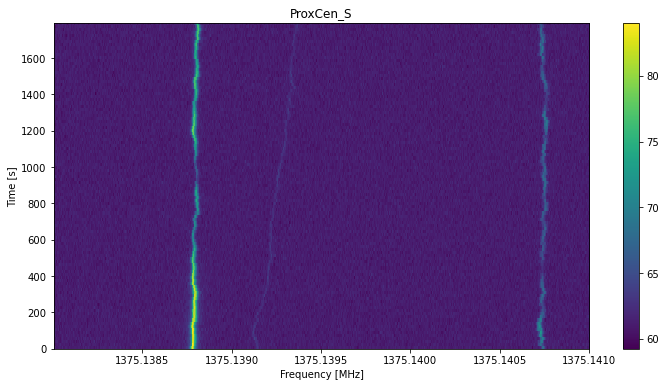

In [241]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        234, 1375.138, 1375.141, ax=ax, logged=True)

#### Plotting hit 57

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
57,0.652371,7.029739e+06,1407.999348,171,1408.0,1407.995258,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


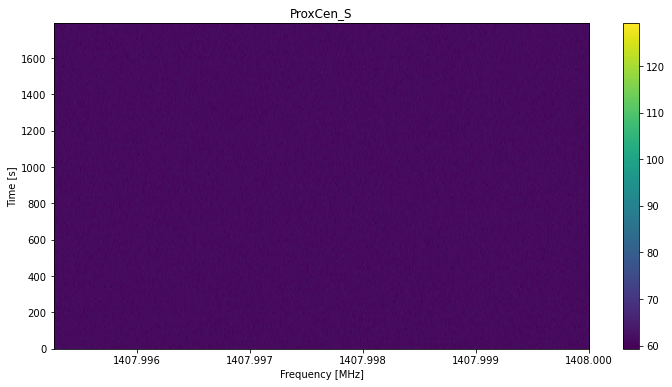

In [242]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        57, ax=ax, logged=True)

#### Ploting 248

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
248,-0.550372,1122.377074,1374.991749,264307,1374.995846,1374.987659,24,327764,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


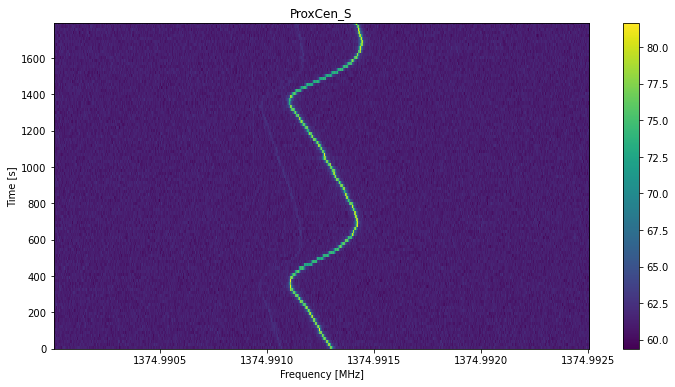

In [246]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        248, 1374.99, 1374.9925, ax=ax, logged=True)

#### Hit number 19

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
19,0.667246,38.728445,1439.999149,223,1440.0,1439.99506,8,446594,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


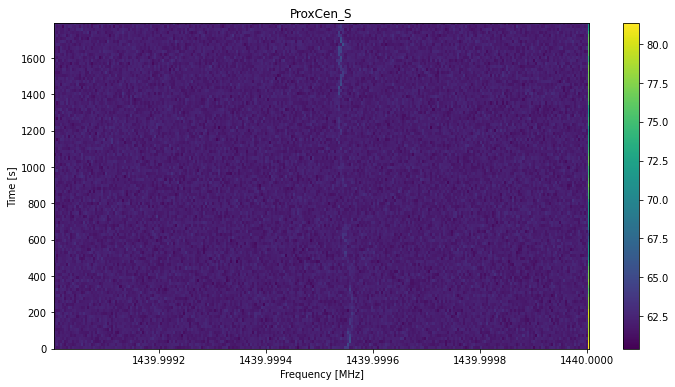

In [251]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        19,1439.999, 1440, ax=ax)

#### Hit 58

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
58,-0.998744,7.029739e+06,1404.000996,1048315,1404.005093,1404.000004,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


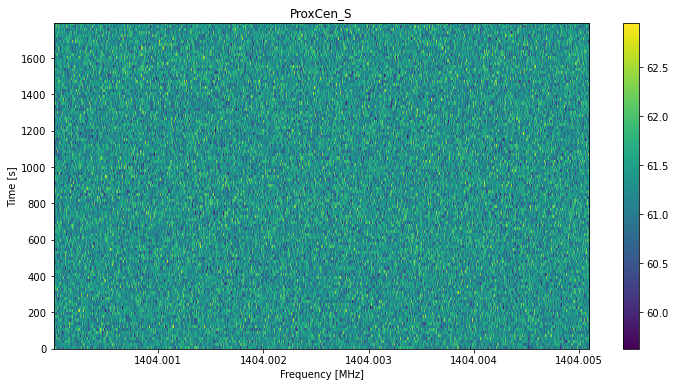

In [252]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        58, ax=ax, logged=True)

#### Hit 25

,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
TopHitNum,,,,,,,,,,,,,,,,,,,
25,0.017,2776.616111,1437.645088,617326,1437.649185,1437.640999,8,446594,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


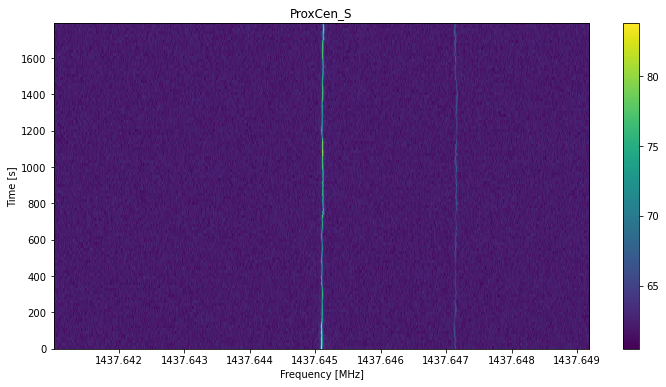

In [253]:
fig, ax = plt.subplots(figsize=(12,6))
plothit("/datax/scratch/ssmith/out2019-04-29/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5", 
        25, ax=ax, logged=True)

This hit looks very similar to hit 234

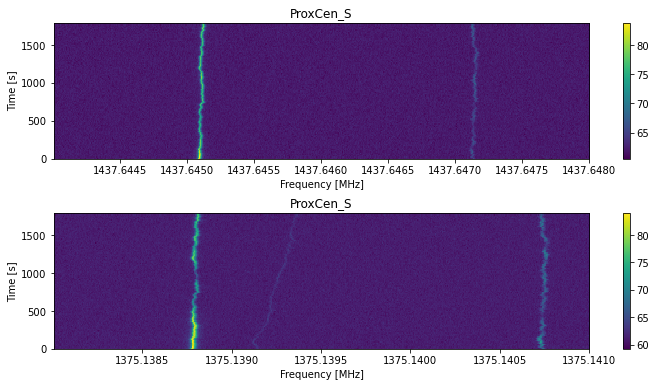

In [162]:
fb25 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1437.644,f_stop=1437.648)
fb234 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1375.138,f_stop=1375.141)
mst, ax = plt.subplots(2,1, figsize=(12,6))
mst.subplots_adjust(hspace=0.4)
fig = plt.subplot(2,1,1)
fb25.plot_waterfall(logged=True)
fig1 = plt.subplot(2,1,2)
fb234.plot_waterfall(logged=True)

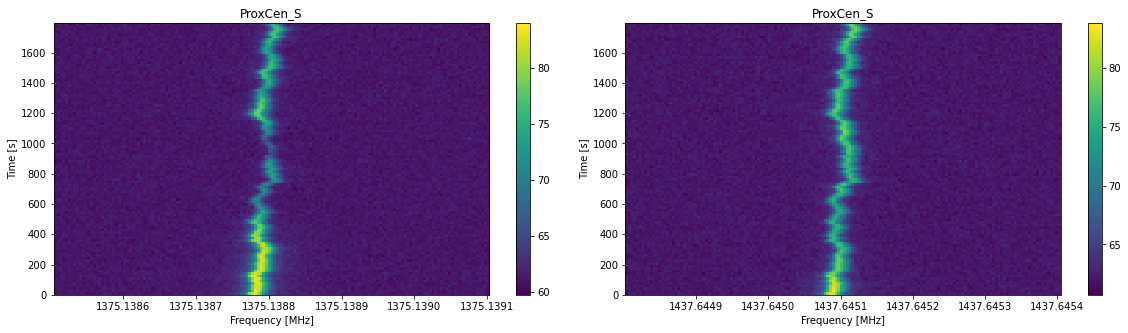

In [185]:
fb234 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1375.1385,f_stop=1375.1391)
fb25 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1437.6448,f_stop=1437.6454)
mst, ax = plt.subplots(1,2, figsize=(20,5))
mst.subplots_adjust(wspace=0.05)
fig = plt.subplot(1,2,1)
fb234.plot_waterfall(logged=True)
fig1 = plt.subplot(1,2,2)
fb25.plot_waterfall(logged=True)